Let's look at the H1-B datasets. First, in order to clean up the data, let's consider some questions we want to answer. Let's understand - what regions in the USA have the highest success rate, what countries of origin have the highest success rate, what professions/industries have the highest success rate, and investigating the pay scales for these values of data.

In light of these questions, let's see what common columns there are and what columns are worth keeping

In [1]:
import pandas as pd
import numpy as np


In [2]:
##these have been imported as excels from the website itself. 
##HOWEVER - considering the size of the data - it can take upwards of 10 minutes to load the data
##it is recommended to convert the files into csv - for which there are options on python
##or on excel itself
##and then run pd.read_csv instead of excel below
df14 = pd.read_excel('PERM_FY14_Q4.xlsx')
df15 = pd.read_excel('PERM_Disclosure_Data_FY15_Q4.xlsx')
df16 = pd.read_excel('PERM_Disclosure_Data_FY16.xlsx')

In [669]:
#df14

In [670]:
#df15

In [671]:
#df16

In [76]:
a = [df14, df15, df16]
for i in a:
    print(len(i.columns))

27
125
125


As can be seen, the number of columns for 2014 is much lower compared to 2015 and 2016. On investigating the 2014 dataframe, let's select equivalent columns for 2015 and 2016 and append the datasets. 

Around 14 columns were identified to be of use when thinking about the original questions. 
A unique case number is retained to ensure duplicate cases can be removed when merging datasets. Payscale data, state where employment will be conducted, and national origin data is retained to answer questions. 
There are some sections found in the 2014 dataset that cannot be found in other datasets (such as the application type (online or mailed)) and the 2015 and 2016 datasets outnumber the 2014 dataset by 98 columns, and so there is a combing through process that is conducted to find the common columns.

•	CASE_NO	Unique identifier assigned to each application submitted for processing to the ETA National Processing Center.  A = Atlanta NPC; C = Chicago NPC

•	DECISION_DATE	Date on which the last significant event or decision was recorded by the ETA National Processing Center.

•	CASE_STATUS	Status associated with the last significant event or decision.  Valid values include “Certified,” “Certified-Expired,” “Denied,” and “Withdrawn”

•	2007_NAICS_US_TITLE	Industry title associated with the NAICS code 

•	US_ECONOMIC_SECTOR	Major economic sector associated with the NAICS code of the employer.  Valid values include “Information Technology, “Advanced Manufacturing, “Aerospace,” “Agribusiness,” “Automotive,” “Biotechnology,” “Construction,” “Educational Services,” “Energy”, “Financial Services,” “Geospatial,” “Health Care,” “Homeland Security,” “Hospitality,” “Retail Trade”, “Transportation”, and “Other Economic Sector.”

•	PW_SOC_TITLE	Name associated with the PW SOC Code

•	JOB_INFO_WORK_STATE	

•	COUNTRY_OF_CITZENSHIP	Country of citizenship of the foreign worker being sponsored by the employer for permanent employment in the United States.

•	CLASS_OF_ADMISSION	If applicable, indicates the class of immigration visa the foreign worker held at the time the permanent labor certification application was submitted for processing.

•   PW_LEVEL_9089	Level of the prevailing wage determination.  Valid values include “Level I,” “Level II,” “Level III,” and “Level IV”

•	PW_AMOUNT_9089	Prevailing wage for the job being requested for permanent labor certification

•	PW_UNIT_OF_PAY_9089	Unit of Pay.  Valid values include “Hourly (hr)”, “Weekly (wk),” “Bi-Weekly (bi),” “Monthly (mth),” and “Yearly (yr)”

•	WAGE_OFFER_FROM_9089	Lower range of the wage offer

•	WAGE_OFFER_TO_9089	Upper range of the wage offer

•	WAGE_OFFER_UNIT_OF_PAY_9089	Unit of Pay.  Valid values include “Hourly (hr)”, “Weekly (wk),” “Bi-Weekly (bi),” “Monthly (mth),” and “Yearly (yr)”




In [77]:
#a = ["CASE_NO","Decision_Date","Case_Status"]
#a = [CASE_NO,Decision_Date,Case_Status]
#df14[["CASE_NO","Decision_Date","Case_Status"]]
#df14[a]

list(df14)

['CASE_NO',
 'Decision_Date',
 'Case_Status',
 'APPLICATION_TYPE',
 'Employer_Name',
 'Employer_address_1',
 'Employer_address_2',
 'Employer_City',
 'Employer_State',
 'Employer_Postal_Code',
 '2007_NAICS_US_CODE',
 '2007_NAICS_US_TITLE',
 'US_ECONOMIC_SECTOR',
 'PW_SOC_Code',
 'PW_SOC_TITLE',
 'PW_Job_Title_9089',
 'PW_LEVEL_9089',
 'PW_SOURCE_NAME_9089',
 'PW_AMOUNT_9089',
 'PW_UNIT_OF_PAY_9089',
 'WAGE_OFFERED_FROM_9089',
 'WAGE_OFFERED_TO_9089',
 'WAGE_OFFERED_UNIT_OF_PAY_9089',
 'Job_Info_Work_City',
 'Job_Info_Work_State',
 'Country_of_Citizenship',
 'Class_of_Admission']

In [78]:
a14 = ['CASE_NO',
 'Decision_Date',
 'Case_Status',
 '2007_NAICS_US_TITLE',
 'US_ECONOMIC_SECTOR',
 'PW_SOC_TITLE',
 'PW_LEVEL_9089',
 'PW_AMOUNT_9089',
 'PW_UNIT_OF_PAY_9089',
 'WAGE_OFFERED_FROM_9089',
 'WAGE_OFFERED_TO_9089',
 'WAGE_OFFERED_UNIT_OF_PAY_9089',
 'Job_Info_Work_State',
 'Country_of_Citizenship',
 'Class_of_Admission']

df14[a14]

,CASE_NO,Decision_Date,Case_Status,2007_NAICS_US_TITLE,US_ECONOMIC_SECTOR,PW_SOC_TITLE,PW_LEVEL_9089,PW_AMOUNT_9089,PW_UNIT_OF_PAY_9089,WAGE_OFFERED_FROM_9089,WAGE_OFFERED_TO_9089,WAGE_OFFERED_UNIT_OF_PAY_9089,Job_Info_Work_State,Country_of_Citizenship,Class_of_Admission
0,A-12223-90085,2014-02-21,Certified-Expired,"Research and Development in the Physical, Engi...",Biotechnology,Computer Systems Analysts,Level IV,116542.4,Year,117000.00,NaN,Year,CONNECTICUT,INDIA,H-1B
1,A-12238-94132,2013-10-28,Certified-Expired,Elementary and Secondary Schools,Educational Services,"Secondary School Teachers, Except Special and ...",NaN,36981.0,Year,36981.00,NaN,Year,NEW MEXICO,PHILIPPINES,H-1B
2,A-12238-94142,2014-01-08,Certified-Expired,Discount Department Stores,Retail,"Software Developers, Applications",Level I,42973.0,Year,61380.00,70040.0,Year,ARKANSAS,INDIA,H-1B
3,A-12234-92634,2013-10-23,Certified-Expired,Engineering Services,Aerospace,Electrical and Electronics Engineering Technic...,Level IV,65187.2,Year,65200.00,NaN,Year,GEORGIA,SOUTH KOREA,E-2
4,A-12221-89539,2014-05-22,Certified,Elementary and Secondary Schools,Educational Services,"Software Developers, Applications",Level III,101629.0,Year,101629.00,NaN,Year,NEW YORK,INDIA,H-1B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70993,A-13051-41905,2014-09-30,Withdrawn,Investment Banking and Securities Dealing,Finance,Computer Systems Analysts,Level III,92206.0,Year,123700.00,155000.0,Year,NEW JERSEY,TURKEY,H-1B
70994,A-14129-67902,2014-05-09,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,14.08,NaN,Hour,MARYLAND,SOUTH KOREA,F-1
70995,A-13219-86523,2014-03-11,Withdrawn,All Other Motor Vehicle Parts Manufacturing,Automotive,Human Resources Managers,Level IV,89898.0,Year,90000.00,NaN,Year,ALABAMA,CANADA,H-1B
70996,A-14267-09766,2014-09-24,Denied,NaN,NaN,NaN,NaN,NaN,NaN,45000.00,50000.0,NaN,TEXAS,NaN,NaN


In [79]:
a14 = ['CASE_NO', #
 'Decision_Date', #
 'Case_Status',#
 'US_ECONOMIC_SECTOR',
 'PW_SOC_TITLE', #
 'PW_LEVEL_9089', #
 'PW_AMOUNT_9089', #
 'PW_UNIT_OF_PAY_9089',#
 'WAGE_OFFERED_FROM_9089', #
 'WAGE_OFFERED_TO_9089',#
 'WAGE_OFFERED_UNIT_OF_PAY_9089', #
 'Job_Info_Work_State', #
 'Country_of_Citizenship', #
 'Class_of_Admission',
       '2007_NAICS_US_TITLE' #
] #

a15 = ['CASE_NUMBER', #'CASE_NO',
 'DECISION_DATE', # 'Decision_Date',
 'CASE_STATUS', # 'Case_Status',
 'JOB_INFO_MAJOR', #Similar to economic sector but not quite the same
 'PW_SOC_TITLE', #
 'PW_LEVEL_9089', #
 'PW_AMOUNT_9089', #
 'PW_UNIT_OF_PAY_9089', #
 'WAGE_OFFER_FROM_9089', #
 'WAGE_OFFER_TO_9089', #
 'WAGE_OFFER_UNIT_OF_PAY_9089', #
 'JOB_INFO_WORK_STATE', #
 'COUNTRY_OF_CITIZENSHIP', #
 'CLASS_OF_ADMISSION', #
 'NAICS_US_TITLE', #
]

a16 = ['CASE_NUMBER', #
 'DECISION_DATE', #
 'CASE_STATUS', #
 'JOB_INFO_MAJOR', #Similar to economic sector but not quite the same
 'PW_SOC_TITLE', #
 'PW_LEVEL_9089', #
 'PW_AMOUNT_9089', #
 'PW_UNIT_OF_PAY_9089', #
 'WAGE_OFFER_FROM_9089', #
 'WAGE_OFFER_TO_9089', #
 'WAGE_OFFER_UNIT_OF_PAY_9089', #
 'JOB_INFO_WORK_STATE', #
 'COUNTRY_OF_CITIZENSHIP', #
 'CLASS_OF_ADMISSION', #
  'NAICS_US_TITLE', #
]


#list(df16)
mdf14 = df14[a14]
mdf15 = df15[a15]
mdf16 = df16[a16]

##JOB_INFO_MAJOR was merged with economic sector to see if there may be some overlap. As 
##will be shown, this is not the case, and many of the industry columns have very varied data
##that would take time to standardise

In [80]:
for i, j in zip(a14, a15):
    print(i)
    print(j)
    mdf14 = mdf14.rename(columns={i:j})
        
mdf14
#renaming the columns so they append without issue

CASE_NO
CASE_NUMBER
Decision_Date
DECISION_DATE
Case_Status
CASE_STATUS
US_ECONOMIC_SECTOR
JOB_INFO_MAJOR
PW_SOC_TITLE
PW_SOC_TITLE
PW_LEVEL_9089
PW_LEVEL_9089
PW_AMOUNT_9089
PW_AMOUNT_9089
PW_UNIT_OF_PAY_9089
PW_UNIT_OF_PAY_9089
WAGE_OFFERED_FROM_9089
WAGE_OFFER_FROM_9089
WAGE_OFFERED_TO_9089
WAGE_OFFER_TO_9089
WAGE_OFFERED_UNIT_OF_PAY_9089
WAGE_OFFER_UNIT_OF_PAY_9089
Job_Info_Work_State
JOB_INFO_WORK_STATE
Country_of_Citizenship
COUNTRY_OF_CITIZENSHIP
Class_of_Admission
CLASS_OF_ADMISSION
2007_NAICS_US_TITLE
NAICS_US_TITLE


,CASE_NUMBER,DECISION_DATE,CASE_STATUS,JOB_INFO_MAJOR,PW_SOC_TITLE,PW_LEVEL_9089,PW_AMOUNT_9089,PW_UNIT_OF_PAY_9089,WAGE_OFFER_FROM_9089,WAGE_OFFER_TO_9089,WAGE_OFFER_UNIT_OF_PAY_9089,JOB_INFO_WORK_STATE,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,NAICS_US_TITLE
0,A-12223-90085,2014-02-21,Certified-Expired,Biotechnology,Computer Systems Analysts,Level IV,116542.4,Year,117000.00,NaN,Year,CONNECTICUT,INDIA,H-1B,"Research and Development in the Physical, Engi..."
1,A-12238-94132,2013-10-28,Certified-Expired,Educational Services,"Secondary School Teachers, Except Special and ...",NaN,36981.0,Year,36981.00,NaN,Year,NEW MEXICO,PHILIPPINES,H-1B,Elementary and Secondary Schools
2,A-12238-94142,2014-01-08,Certified-Expired,Retail,"Software Developers, Applications",Level I,42973.0,Year,61380.00,70040.0,Year,ARKANSAS,INDIA,H-1B,Discount Department Stores
3,A-12234-92634,2013-10-23,Certified-Expired,Aerospace,Electrical and Electronics Engineering Technic...,Level IV,65187.2,Year,65200.00,NaN,Year,GEORGIA,SOUTH KOREA,E-2,Engineering Services
4,A-12221-89539,2014-05-22,Certified,Educational Services,"Software Developers, Applications",Level III,101629.0,Year,101629.00,NaN,Year,NEW YORK,INDIA,H-1B,Elementary and Secondary Schools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70993,A-13051-41905,2014-09-30,Withdrawn,Finance,Computer Systems Analysts,Level III,92206.0,Year,123700.00,155000.0,Year,NEW JERSEY,TURKEY,H-1B,Investment Banking and Securities Dealing
70994,A-14129-67902,2014-05-09,Withdrawn,NaN,NaN,NaN,NaN,NaN,14.08,NaN,Hour,MARYLAND,SOUTH KOREA,F-1,NaN
70995,A-13219-86523,2014-03-11,Withdrawn,Automotive,Human Resources Managers,Level IV,89898.0,Year,90000.00,NaN,Year,ALABAMA,CANADA,H-1B,All Other Motor Vehicle Parts Manufacturing
70996,A-14267-09766,2014-09-24,Denied,NaN,NaN,NaN,NaN,NaN,45000.00,50000.0,NaN,TEXAS,NaN,NaN,NaN


In [506]:
mdfall = mdf14.append(mdf15)
mdfall = mdfall.append(mdf16)

if list(mdf14)==list(mdf15)==list(mdf16)==list(mdfall):
    print('all the column names of the three datasets are the same')
#checking if column names have been properly accounted for 

diff_len = ((len(mdf14)+len(mdf15)+len(mdf16)) - len(mdfall))
#print(diff_len)

if diff_len==0:
    print('the new dataset combines all three datasets fully')
    print(len(mdfall), 'is the number of values in the dataset')
#the new database with all three datasets is the same size
#as the combined value of the three datasets subtracted from the final size of the dataset
#is zero

all the column names of the three datasets are the same
the new dataset combines all three datasets fully
286440 is the number of values in the dataset


In [276]:
mdfall.to_csv('WPA_H1B.csv')
#at this stage, this can be saved as a CSV to work on later

In [507]:
#45 minutes until now cumulatively have been spent 
#and a lot of that time also went into research to understand the terminology and 
#planning potential ways to break down the data

In [508]:
#Let's see how many unique values there are for each column
#as can be seen, NAICS_US_TITLE and JOB_INFO_MAJOR have many unique values
#While they originally seemed to be useful as they could give profession-level analysis
#of the petitions, it would take a while to standardise them
#and so these columns will be dropped. 
#Even PW_SOC_TITLE which has the least; it would take a while to standardise
#and so this one will be dropped as well. 
for i in list(mdfall):
    print(len(mdfall[i].unique()), i)
    

285344 CASE_NUMBER
926 DECISION_DATE
4 CASE_STATUS
48302 JOB_INFO_MAJOR
803 PW_SOC_TITLE
5 PW_LEVEL_9089
19507 PW_AMOUNT_9089
6 PW_UNIT_OF_PAY_9089
30852 WAGE_OFFER_FROM_9089
12564 WAGE_OFFER_TO_9089
6 WAGE_OFFER_UNIT_OF_PAY_9089
114 JOB_INFO_WORK_STATE
199 COUNTRY_OF_CITIZENSHIP
56 CLASS_OF_ADMISSION
1514 NAICS_US_TITLE


In [509]:
mdfall = mdfall.drop(columns=['JOB_INFO_MAJOR', 'NAICS_US_TITLE', 'PW_SOC_TITLE'])
#this is to demonstrate how columns can be dropped

In [510]:
#mdfall[mdfall.duplicated(keep=False)] #this can be used to see the number of duplicates
mdfall = mdfall.drop_duplicates(subset=['CASE_NUMBER'], keep='last') 
#specifying case number removes more duplicates so this method is used instead of a general duplicate removal
#the last duplicate is retained because individually investigating 150+ duplicates would be tedious 
#and that on brief inspection many of the duplicates are same across the rows
#and that it may be minor differences in float values that could be driving this
mdfall

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,PW_LEVEL_9089,PW_AMOUNT_9089,PW_UNIT_OF_PAY_9089,WAGE_OFFER_FROM_9089,WAGE_OFFER_TO_9089,WAGE_OFFER_UNIT_OF_PAY_9089,JOB_INFO_WORK_STATE,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION
0,A-12223-90085,2014-02-21,Certified-Expired,Level IV,116542.4,Year,117000.0,NaN,Year,CONNECTICUT,INDIA,H-1B
1,A-12238-94132,2013-10-28,Certified-Expired,NaN,36981.0,Year,36981.0,NaN,Year,NEW MEXICO,PHILIPPINES,H-1B
2,A-12238-94142,2014-01-08,Certified-Expired,Level I,42973.0,Year,61380.0,70040.0,Year,ARKANSAS,INDIA,H-1B
3,A-12234-92634,2013-10-23,Certified-Expired,Level IV,65187.2,Year,65200.0,NaN,Year,GEORGIA,SOUTH KOREA,E-2
4,A-12221-89539,2014-05-22,Certified,Level III,101629.0,Year,101629.0,NaN,Year,NEW YORK,INDIA,H-1B
...,...,...,...,...,...,...,...,...,...,...,...,...
126138,A-16209-36597,2016-09-30,Certified,Level I,17451.0,Year,17451.0,NaN,Year,OH,SOUTH KOREA,NaN
126139,A-16209-36598,2016-09-30,Certified,Level I,17451.0,Year,17451.0,NaN,Year,OH,SOUTH KOREA,F-1
126140,A-16054-75755,2016-09-30,Denied,Level I,18574.0,Year,25240.0,NaN,Year,WI,SOUTH KOREA,NaN
126141,A-16038-70210,2016-09-30,Denied,Level I,18574.0,Year,25240.0,NaN,Year,WI,SOUTH KOREA,NaN


In [511]:
#Let's make the names of states standard

states = {
    'AK': 'ALASKA',
    'AL': 'ALABAMA',
    'AR': 'ARKANSAS',
    'AZ': 'ARIZONA',
    'CA': 'CALIFORNIA',
    'CO': 'COLORADO',
    'CT': 'CONNECTICUT',
    'DC': 'DISTRICT OF COLUMBIA',
    'DE': 'DELAWARE',
    'FL': 'FLORIDA',
    'GA': 'GEORGIA',
    'HI': 'HAWAII',
    'IA': 'IOWA',
    'ID': 'IDAHO',
    'IL': 'ILLINOIS',
    'IN': 'INDIANA',
    'KS': 'KANSAS',
    'KY': 'KENTUCKY',
    'LA': 'LOUISIANA',
    'MA': 'MASSACHUSETTS',
    'MD': 'MARYLAND',
    'ME': 'MAINE',
    'MI': 'MICHIGAN',
    'MN': 'MINNESOTA',
    'MO': 'MISSOURI',
    'MS': 'MISSISSIPPI',
    'MT': 'MONTANA',
    'NC': 'NORTH CAROLINA',
    'ND': 'NORTH DAKOTA',
    'NE': 'NEBRASKA',
    'NH': 'NEW HAMPSHIRE',
    'NJ': 'NEW JERSEY',
    'NM': 'NEW MEXICO',
    'NV': 'NEVADA',
    'NY': 'NEW YORK',
    'OH': 'OHIO',
    'OK': 'OKLAHOMA',
    'OR': 'OREGON',
    'PA': 'PENNSYLVANIA',
    'RI': 'RHODE ISLAND',
    'SC': 'SOUTH CAROLINA',
    'SD': 'SOUTH DAKOTA',
    'TN': 'TENNESSEE',
    'TX': 'TEXAS',
    'UT': 'UTAH',
    'VA': 'VIRGINIA',
    'VT': 'VERMONT',
    'WA': 'WASHINGTON',
    'WI': 'WISCONSIN',
    'WV': 'WEST VIRGINIA',
    'WY': 'WYOMING',
    'AS' : 'AMERICAN SAMOA',
'FM' : 'FEDERATED STATES OF MICRONESIA',
'GU' : 'GUAM',
'MH' : 'MARSHALL ISLANDS',
'MP': 'NORTHERN MARIANA ISLANDS',
'PR' : 'PUERTO RICO',
'PW' : 'PALAU',
'VI' : 'VIRGIN ISLANDS',
'UM' : 'U.S. MINOR OUTLYING ISLANDS '
}


#Let's reverse the dictionary so the final table will list the states as the abbreviations
#and not the full names
states_abr = {v: k for k, v in states.items()}

#we can rename the columns later using the main dictionary if we want the full names
mdfall=mdfall.replace({"JOB_INFO_WORK_STATE": states_abr})
mdfall['JOB_INFO_WORK_STATE'].unique()
#there's opportunity to investigate this with other datasets
#for e.g. this average and median salary dataset
#https://www.sofi.com/learn/content/average-salary-in-us/

#USA list of states: 
#https://gist.github.com/JeffPaine/3083347
#and territory abbreviations
#https://stamps.custhelp.com/app/answers/detail/a_id/4377/~/us-territory-and-possession-address-abbreviations


array(['CT', 'NM', 'AR', 'GA', 'NY', 'NJ', 'WI', 'CA', 'VA', 'FL', 'TX',
       'IL', 'MO', 'NC', 'MA', 'OK', 'MI', 'MD', 'UT', 'NH', 'OH', 'AL',
       'DC', 'WA', 'IN', 'PA', 'LA', 'OR', 'NV', 'AZ', 'CO', 'MS', 'KS',
       'SC', 'RI', 'TN', 'KY', 'ID', 'MN', 'NE', 'DE', 'IA', 'HI', 'ND',
       'WV', 'PR', 'GU', 'ME', 'AK', 'VT', 'SD', 'WY', 'MP', 'MT', 'VI',
       'MH', nan, 'FM'], dtype=object)

In [512]:
mdfall.dtypes
#this is a quick way to check what data types each column has 
#the date value is well formatted
#however, the pay columns, some of them should be floats
#Let's deal with this later when we come to using pay calculations 

CASE_NUMBER                            object
DECISION_DATE                  datetime64[ns]
CASE_STATUS                            object
PW_LEVEL_9089                          object
PW_AMOUNT_9089                        float64
PW_UNIT_OF_PAY_9089                    object
WAGE_OFFER_FROM_9089                   object
WAGE_OFFER_TO_9089                     object
WAGE_OFFER_UNIT_OF_PAY_9089            object
JOB_INFO_WORK_STATE                    object
COUNTRY_OF_CITIZENSHIP                 object
CLASS_OF_ADMISSION                     object
dtype: object

In [513]:
mdfall

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,PW_LEVEL_9089,PW_AMOUNT_9089,PW_UNIT_OF_PAY_9089,WAGE_OFFER_FROM_9089,WAGE_OFFER_TO_9089,WAGE_OFFER_UNIT_OF_PAY_9089,JOB_INFO_WORK_STATE,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION
0,A-12223-90085,2014-02-21,Certified-Expired,Level IV,116542.4,Year,117000.0,NaN,Year,CT,INDIA,H-1B
1,A-12238-94132,2013-10-28,Certified-Expired,NaN,36981.0,Year,36981.0,NaN,Year,NM,PHILIPPINES,H-1B
2,A-12238-94142,2014-01-08,Certified-Expired,Level I,42973.0,Year,61380.0,70040.0,Year,AR,INDIA,H-1B
3,A-12234-92634,2013-10-23,Certified-Expired,Level IV,65187.2,Year,65200.0,NaN,Year,GA,SOUTH KOREA,E-2
4,A-12221-89539,2014-05-22,Certified,Level III,101629.0,Year,101629.0,NaN,Year,NY,INDIA,H-1B
...,...,...,...,...,...,...,...,...,...,...,...,...
126138,A-16209-36597,2016-09-30,Certified,Level I,17451.0,Year,17451.0,NaN,Year,OH,SOUTH KOREA,NaN
126139,A-16209-36598,2016-09-30,Certified,Level I,17451.0,Year,17451.0,NaN,Year,OH,SOUTH KOREA,F-1
126140,A-16054-75755,2016-09-30,Denied,Level I,18574.0,Year,25240.0,NaN,Year,WI,SOUTH KOREA,NaN
126141,A-16038-70210,2016-09-30,Denied,Level I,18574.0,Year,25240.0,NaN,Year,WI,SOUTH KOREA,NaN


In [514]:
mdfall['CASE_STATUS'].unique()
#as can be seen, there are 4 unique case status as outlined in the 
#disclosure internal data file structure
#so no modifications are necessary for this 

array(['Certified-Expired', 'Certified', 'Denied', 'Withdrawn'],
      dtype=object)

In [515]:
mdfall['CLASS_OF_ADMISSION'] = mdfall['CLASS_OF_ADMISSION'].fillna('None')
mdfall['COUNTRY_OF_CITIZENSHIP'] = mdfall['COUNTRY_OF_CITIZENSHIP'].fillna('UNIDENTIFIED')


#mdfall['COUNTRY_OF_CITIZENSHIP'].unique() 
#mdfall['COUNTRY_OF_CITIZENSHIP'].isna().sum()
#mdfall['CLASS_OF_ADMISSION'].unique()
#mdfall['CASE_STATUS'].isna().sum()
#mdfall['CLASS_OF_ADMISSION'].isna().sum()





#A few of the other columns were also inspected with checking unique values to see 
#if any stood out
#aside from NaN values (which will be dealt individually for their specific analysis)
#There is generally consistency with what the column indicates for the data
#There are no NaN values for case status

Let's start with doing some analysis. Let's the makeup of case status for each country of citizenship. 

In [516]:
##This whole section essentially aggregates data. 
##What it does is take the number of petitions and its outcome status 
##and attaches those statistics to a country 
##and the final section there is the possibility to view different metrics
##such as the most certified, most denied, national origins with most petitions
##this shall be replicated for other columns as well. 

assess_column='COUNTRY_OF_CITIZENSHIP'

country_case = mdfall.groupby([assess_column, 'CASE_STATUS']).size().to_frame('NUM_PETITIONS').reset_index()
country_case

country_agg = []

for i in list(mdfall[assess_column].unique()):
    a = country_case[country_case[assess_column] == i].reset_index()
    total_all = a['NUM_PETITIONS'].sum()
    b = a[a['CASE_STATUS'] == 'Certified'].reset_index()
    if b.empty:
        total_certified = 0
    else:
        total_certified = b.at[0, 'NUM_PETITIONS']
    c = a[a['CASE_STATUS'] == 'Denied'].reset_index()
    if c.empty:
        total_denied = 0
    else:
        total_denied = c.at[0, 'NUM_PETITIONS']
    d = a[a['CASE_STATUS'] == 'Denied'].reset_index()
    if c.empty:
        total_denied = 0
    else:
        total_denied = c.at[0, 'NUM_PETITIONS']
    #print(total_all, total_certified, total_denied)
    
    country_agg.append(
        {
            assess_column: i,
            'total_petitions': total_all,
            'total_certified': total_certified,
            'total_denied': total_denied,
            'percentage_certified': (total_certified/total_all)*100,
            'percentage_denied': (total_denied/total_all)*100
        }
    )
    country_case = mdfall[['AVG_WAGE_OFFER', 'CASE_STATUS', assess_column]].groupby(['CASE_STATUS', assess_column]).mean()
    print(country_case)


aggregates_of_outcomes = pd.DataFrame(country_agg)
top_percentile_aggregate = aggregates_of_outcomes[aggregates_of_outcomes.total_petitions 
                                                  > aggregates_of_outcomes.total_petitions.quantile(.60)]
print(top_percentile_aggregate[[assess_column, 'total_petitions']].nlargest(5, 'total_petitions'))
print(top_percentile_aggregate[[assess_column, 'percentage_certified']].nlargest(5, 'percentage_certified'))
print(top_percentile_aggregate[[assess_column, 'percentage_denied']].nlargest(5, 'percentage_denied'))


   COUNTRY_OF_CITIZENSHIP  total_petitions
0                   INDIA           156837
10                  CHINA            23119
2             SOUTH KOREA            19633
14                 CANADA            11036
8                  MEXICO             6315
   COUNTRY_OF_CITIZENSHIP  percentage_certified
89                 SERBIA             53.125000
39               ETHIOPIA             51.145038
65             BANGLADESH             50.609756
12                UKRAINE             50.332226
37                   IRAN             50.000000
   COUNTRY_OF_CITIZENSHIP  percentage_denied
76              GUATEMALA          27.480916
24            EL SALVADOR          25.377644
23                ECUADOR          24.117647
60                JAMAICA          19.135802
19               HONDURAS          17.959184


Certified            47.469370
Certified-Expired    42.722118
Denied                5.243846
Withdrawn             4.564666
Name: CASE_STATUS, dtype: float64
    COUNTRY_OF_CITIZENSHIP  TOTAL_PETITIONS
0                    INDIA           156837
1                    CHINA            23119
2              SOUTH KOREA            19633
3                   CANADA            11036
4                   MEXICO             6315
..                     ...              ...
194         CAYMAN ISLANDS                1
195             MOZAMBIQUE                1
196                SOMALIA                1
197   NETHERLANDS ANTILLES                1
198                  QATAR                1

[199 rows x 2 columns]


array([[<AxesSubplot:ylabel='INDIA'>, <AxesSubplot:ylabel='CHINA'>,
        <AxesSubplot:ylabel='SOUTH KOREA'>],
       [<AxesSubplot:ylabel='CANADA'>, <AxesSubplot:ylabel='MEXICO'>,
        <AxesSubplot:>]], dtype=object)

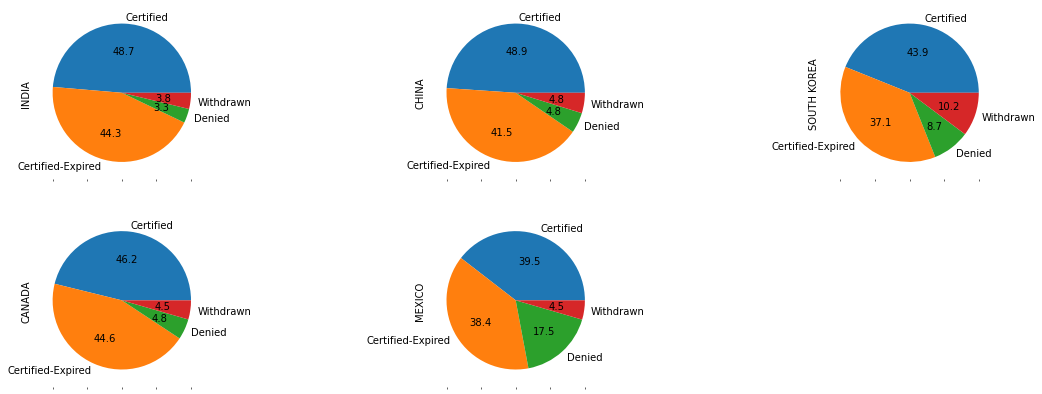

In [517]:
##This section aims to graph outputs visually into a pie chart 

#The output of the below shows the percentage values for each outcome
print(mdfall['CASE_STATUS'].value_counts(normalize=True)* 100)

#the below brings up the dataframe for a specific value in a column
#this can be used to investigate specific values
#mdfall[mdfall['COUNTRY_OF_CITIZENSHIP'] == 'value']

#The groupby automatically drops the NaN value associated with a column, and so we do not need to 
#use dropna for this
#however, we have already replaced NaN values with unidentified earlier

#Here, the country of citizenship and case status is being grouped together
#its count is determined and then the count is labelled with NUM_PETITIONS
#and the index is reset to return it to a dataframe structure
country_case = mdfall.groupby(['COUNTRY_OF_CITIZENSHIP', 'CASE_STATUS']).size().to_frame('NUM_PETITIONS').reset_index()


##the below can be used to plot a graph for a specific country 
#country_case = country_case.set_index('CASE_STATUS')
#country_case = country_case[country_case['COUNTRY_OF_CITIZENSHIP'] == 'ALGERIA']
#plot = country_case.plot.pie(y='NUM_PETITIONS', figsize=(5, 5))

##the below makes a pivot table, where the case status is used as the index to label graphs, and the values
##based on the number of petitions determines the size of the 'pie' in the pie chart 
##any NaN values for a combination of case status with country of citizenship are defaulted to 0
##and sum is used as the aggregate function although there is no real summation happening as the 
##groupby already completed the aggregation
country_case_piv = country_case.pivot_table(index='CASE_STATUS', columns='COUNTRY_OF_CITIZENSHIP',
                        values='NUM_PETITIONS', aggfunc='sum', fill_value=0)

##in the below two, the countries are ranked by the total sum of how many petitions are received from 
##people of those national origins. The values are set to descending to get the highest
##and the top 5 are selected to create the final pie charts
ranked_countries = country_case_piv.sum().sort_values(ascending=False).to_frame('TOTAL_PETITIONS').reset_index()
print(ranked_countries)

top_countries = country_case_piv.sum().sort_values(ascending=False).head(5).index

##Now, the pie charts are created. There is a re-indexing to ensure only the top 5 countries of national
##origin for petitions have a pie chart made for them
country_case_piv.reindex(columns=top_countries).plot.pie(subplots=True,
                                             figsize=(20, 7),
                                             layout=(-1, 3), legend=False,
                                             autopct='%.1f')


Let's repeat this for other groupings. For example, class of admission to case status. 

In [518]:
##This whole section essentially aggregates data. 
##What it does is take the number of petitions and its outcome status 
##and the final section there is the possibility to view different metrics
##such as the most certified, most denied, national origins with most petitions
##and this is evaluated for column values that are above a certain percentile
##so that the countries that show up aren't ones with minor or skewed statistics
##this shall be replicated for other columns as well. 

assess_column='CLASS_OF_ADMISSION'

country_case = mdfall.groupby([assess_column, 'CASE_STATUS']).size().to_frame('NUM_PETITIONS').reset_index()
country_case

country_agg = []


for i in list(mdfall[assess_column].unique()):
    a = country_case[country_case[assess_column] == i].reset_index()
    total_all = a['NUM_PETITIONS'].sum()
    b = a[a['CASE_STATUS'] == 'Certified'].reset_index()
    if b.empty:
        total_certified = 0
    else:
        total_certified = b.at[0, 'NUM_PETITIONS']
    c = a[a['CASE_STATUS'] == 'Denied'].reset_index()
    if c.empty:
        total_denied = 0
    else:
        total_denied = c.at[0, 'NUM_PETITIONS']
    #print(total_all, total_certified, total_denied)
    
    country_agg.append(
        {
            assess_column: i,
            'total_petitions': total_all,
            'total_certified': total_certified,
            'total_denied': total_denied,
            'percentage_certified': (total_certified/total_all)*100,
            'percentage_denied': (total_denied/total_all)*100
        }
    )

aggregates_of_outcomes = pd.DataFrame(country_agg)
top_percentile_aggregate = aggregates_of_outcomes[aggregates_of_outcomes.total_petitions 
                                                  > aggregates_of_outcomes.total_petitions.quantile(.60)]
print(top_percentile_aggregate[[assess_column, 'total_petitions']].nlargest(5, 'total_petitions'))
print(top_percentile_aggregate[[assess_column, 'percentage_certified']].nlargest(5, 'percentage_certified'))
print(top_percentile_aggregate[[assess_column, 'percentage_denied']].nlargest(5, 'percentage_denied'))


  CLASS_OF_ADMISSION  total_petitions
0               H-1B           214801
7               None            17211
2                L-1            16433
3                F-1            11924
8         Not in USA             7082
   CLASS_OF_ADMISSION  percentage_certified
5                 E-3             52.601969
12                J-1             49.316940
2                 L-1             48.433031
17                H-4             48.327138
21                O-1             48.264463
   CLASS_OF_ADMISSION  percentage_denied
9                 EWI          34.140017
22                B-1          32.493703
20               H-2B          29.501916
11                B-2          21.674662
16                P-1          16.891892


   CLASS_OF_ADMISSION  TOTAL_PETITIONS
0                H-1B           214801
1                None            17211
2                 L-1            16433
3                 F-1            11924
4          Not in USA             7082
5                  TN             3333
6                 E-2             3273
7                 B-2             2293
8             Parolee             1546
9                 EWI             1157
10                F-2              744
11                J-1              732
12                E-3              711
13                O-1              605
14                H-4              538
15                L-2              411
16                E-1              397
17                B-1              397
18              H-1B1              364
19               H-2B              261
20                P-1              148
21                TPS              134
22              A1/A2              114
23                R-1               94
24               H-2A    

array([[<AxesSubplot:ylabel='H-1B'>, <AxesSubplot:ylabel='None'>,
        <AxesSubplot:ylabel='L-1'>],
       [<AxesSubplot:ylabel='F-1'>, <AxesSubplot:ylabel='Not in USA'>,
        <AxesSubplot:>]], dtype=object)

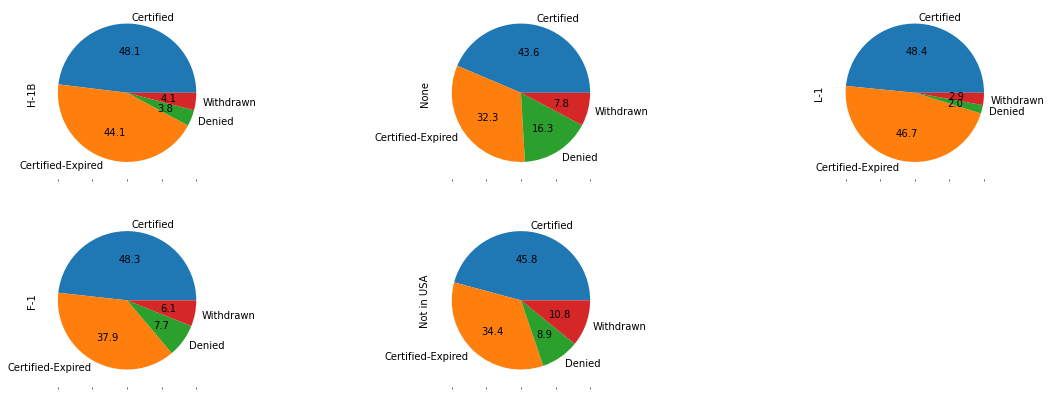

In [519]:
##Ideally, the variables would be renamed. Since python is sequential, at the moment, 
##since these variables will not be re-used, it is determined to continue with the same setup
##the column that it is being assessed is being changed however so a variable below is renamed
##to ensure the statistics are relevant to this
assess_column='CLASS_OF_ADMISSION'


country_case = mdfall.groupby([assess_column, 'CASE_STATUS']).size().to_frame('NUM_PETITIONS').reset_index()

country_case_piv = country_case.pivot_table(index='CASE_STATUS', columns=assess_column,
                        values='NUM_PETITIONS', aggfunc='sum', fill_value=0)

ranked_countries = country_case_piv.sum().sort_values(ascending=False).to_frame('TOTAL_PETITIONS').reset_index()
print(ranked_countries)

top_countries = country_case_piv.sum().sort_values(ascending=False).head(5).index

country_case_piv.reindex(columns=top_countries).plot.pie(subplots=True,
                                             figsize=(20, 7),
                                             layout=(-1, 3), legend=False,
                                             autopct='%.1f')


Let's repeat this for state of work. The state is being renamed to its longer name for easier identification

In [530]:
mdfall['JOB_INFO_WORK_STATE'] = mdfall['JOB_INFO_WORK_STATE'].fillna('UNIDENTIFIED')
mdfall=mdfall.replace({"JOB_INFO_WORK_STATE": states})
mdfall['JOB_INFO_WORK_STATE'].unique()

array(['CONNECTICUT', 'NEW MEXICO', 'ARKANSAS', 'GEORGIA', 'NEW YORK',
       'NEW JERSEY', 'WISCONSIN', 'CALIFORNIA', 'VIRGINIA', 'FLORIDA',
       'TEXAS', 'ILLINOIS', 'MISSOURI', 'NORTH CAROLINA', 'MASSACHUSETTS',
       'OKLAHOMA', 'MICHIGAN', 'MARYLAND', 'UTAH', 'NEW HAMPSHIRE',
       'OHIO', 'ALABAMA', 'DISTRICT OF COLUMBIA', 'WASHINGTON', 'INDIANA',
       'PENNSYLVANIA', 'LOUISIANA', 'OREGON', 'NEVADA', 'ARIZONA',
       'COLORADO', 'MISSISSIPPI', 'KANSAS', 'SOUTH CAROLINA',
       'RHODE ISLAND', 'TENNESSEE', 'KENTUCKY', 'IDAHO', 'MINNESOTA',
       'NEBRASKA', 'DELAWARE', 'IOWA', 'HAWAII', 'NORTH DAKOTA',
       'WEST VIRGINIA', 'PUERTO RICO', 'GUAM', 'MAINE', 'ALASKA',
       'VERMONT', 'SOUTH DAKOTA', 'WYOMING', 'NORTHERN MARIANA ISLANDS',
       'MONTANA', 'VIRGIN ISLANDS', 'MARSHALL ISLANDS', 'UNIDENTIFIED',
       'FEDERATED STATES OF MICRONESIA'], dtype=object)

In [521]:
##This whole section essentially aggregates data. 
##What it does is take the number of petitions and its outcome status 
##and the final section there is the possibility to view different metrics
##such as the most certified, most denied, national origins with most petitions
##this shall be replicated for other columns as well. 

assess_column='JOB_INFO_WORK_STATE'

country_case = mdfall.groupby([assess_column, 'CASE_STATUS']).size().to_frame('NUM_PETITIONS').reset_index()
country_case

country_agg = []


for i in list(mdfall[assess_column].unique()):
    a = country_case[country_case[assess_column] == i].reset_index()
    total_all = a['NUM_PETITIONS'].sum()
    b = a[a['CASE_STATUS'] == 'Certified'].reset_index()
    if b.empty:
        total_certified = 0
    else:
        total_certified = b.at[0, 'NUM_PETITIONS']
    c = a[a['CASE_STATUS'] == 'Denied'].reset_index()
    if c.empty:
        total_denied = 0
    else:
        total_denied = c.at[0, 'NUM_PETITIONS']
    #print(total_all, total_certified, total_denied)
    
    country_agg.append(
        {
            assess_column: i,
            'total_petitions': total_all,
            'total_certified': total_certified,
            'total_denied': total_denied,
            'percentage_certified': (total_certified/total_all)*100,
            'percentage_denied': (total_denied/total_all)*100
        }
    )

aggregates_of_outcomes = pd.DataFrame(country_agg)
top_percentile_aggregate = aggregates_of_outcomes[aggregates_of_outcomes.total_petitions 
                                                  > aggregates_of_outcomes.total_petitions.quantile(.60)]
print(top_percentile_aggregate[[assess_column, 'total_petitions']].nlargest(5, 'total_petitions'))
print(top_percentile_aggregate[[assess_column, 'percentage_certified']].nlargest(5, 'percentage_certified'))
print(top_percentile_aggregate[[assess_column, 'percentage_denied']].nlargest(5, 'percentage_denied'))


   JOB_INFO_WORK_STATE  total_petitions
7           CALIFORNIA            67188
10               TEXAS            37698
5           NEW JERSEY            22287
4             NEW YORK            21830
23          WASHINGTON            14084
   JOB_INFO_WORK_STATE  percentage_certified
27              OREGON             57.422463
29             ARIZONA             51.212772
12            MISSOURI             50.220848
10               TEXAS             50.198950
16            MICHIGAN             49.786053
   JOB_INFO_WORK_STATE  percentage_denied
33      SOUTH CAROLINA          13.401639
17            MARYLAND           8.910655
9              FLORIDA           8.066336
3              GEORGIA           7.677586
13      NORTH CAROLINA           7.146108


               JOB_INFO_WORK_STATE  TOTAL_PETITIONS
0                       CALIFORNIA            67188
1                            TEXAS            37698
2                       NEW JERSEY            22287
3                         NEW YORK            21830
4                       WASHINGTON            14084
5                         ILLINOIS            11646
6                    MASSACHUSETTS             9634
7                         VIRGINIA             9246
8                          GEORGIA             8883
9                          FLORIDA             8864
10                        MICHIGAN             8647
11                    PENNSYLVANIA             6752
12                  NORTH CAROLINA             6591
13                            OHIO             4992
14                        MARYLAND             4186
15                          OREGON             3321
16                         ARIZONA             3257
17                     CONNECTICUT             2700
18          

array([[<AxesSubplot:ylabel='CALIFORNIA'>, <AxesSubplot:ylabel='TEXAS'>,
        <AxesSubplot:ylabel='NEW JERSEY'>],
       [<AxesSubplot:ylabel='NEW YORK'>,
        <AxesSubplot:ylabel='WASHINGTON'>, <AxesSubplot:>]], dtype=object)

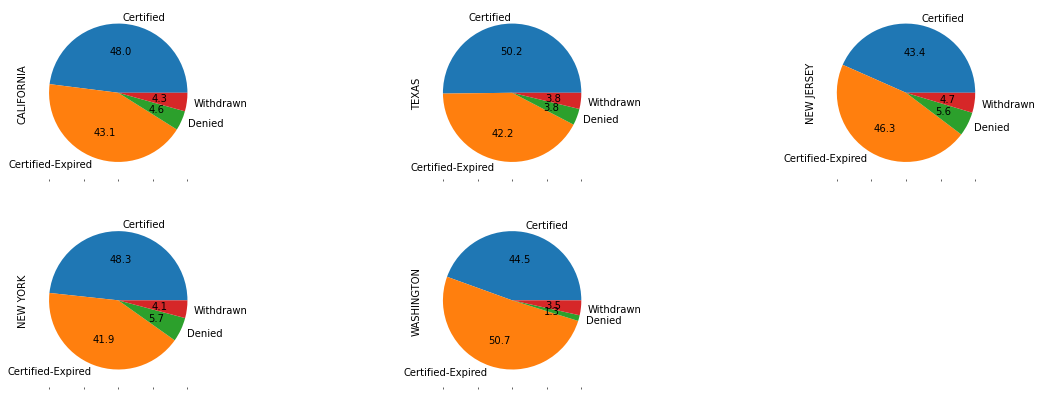

In [522]:
##Ideally, the variables would be renamed. Since python is sequential, at the moment, 
##since these variables will not be re-used, it is determined to continue with the same setup


assess_column='JOB_INFO_WORK_STATE'


country_case = mdfall.groupby([assess_column, 'CASE_STATUS']).size().to_frame('NUM_PETITIONS').reset_index()

country_case_piv = country_case.pivot_table(index='CASE_STATUS', columns=assess_column,
                        values='NUM_PETITIONS', aggfunc='sum', fill_value=0)

ranked_countries = country_case_piv.sum().sort_values(ascending=False).to_frame('TOTAL_PETITIONS').reset_index()
print(ranked_countries)

top_countries = country_case_piv.sum().sort_values(ascending=False).head(5).index

country_case_piv.reindex(columns=top_countries).plot.pie(subplots=True,
                                             figsize=(20, 7),
                                             layout=(-1, 3), legend=False,
                                             autopct='%.1f')

Let's now see salary. Let's calculate an average value that we can use. 

In [567]:
mdfall = mdfall[mdfall['WAGE_OFFER_UNIT_OF_PAY_9089'] == 'Year']
mdfall['WAGE_OFFER_FROM_9089'] = pd.to_numeric(mdfall['WAGE_OFFER_FROM_9089'] , downcast='float', errors='coerce')
mdfall['WAGE_OFFER_TO_9089'] = pd.to_numeric(mdfall['WAGE_OFFER_TO_9089'] , downcast='float', errors='coerce')

mdfall['AVG_WAGE_OFFER'] = mdfall[['WAGE_OFFER_FROM_9089', 'WAGE_OFFER_TO_9089']].mean(axis=1)
mdfall = mdfall.dropna(subset=['AVG_WAGE_OFFER'])
mdfall
##only yearly salary was taken as hourly/weekly/other rates can be different compensations for an annual term 
##some roles may be part-time, so it was decided to focus on simply the wages that provide an annual level of pay

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,PW_LEVEL_9089,PW_AMOUNT_9089,PW_UNIT_OF_PAY_9089,WAGE_OFFER_FROM_9089,WAGE_OFFER_TO_9089,WAGE_OFFER_UNIT_OF_PAY_9089,JOB_INFO_WORK_STATE,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,AVG_WAGE_OFFER
0,A-12223-90085,2014-02-21,Certified-Expired,Level IV,116542.4,Year,117000.0,NaN,Year,CONNECTICUT,INDIA,H-1B,117000.0
1,A-12238-94132,2013-10-28,Certified-Expired,NaN,36981.0,Year,36981.0,NaN,Year,NEW MEXICO,PHILIPPINES,H-1B,36981.0
2,A-12238-94142,2014-01-08,Certified-Expired,Level I,42973.0,Year,61380.0,70040.0,Year,ARKANSAS,INDIA,H-1B,65710.0
3,A-12234-92634,2013-10-23,Certified-Expired,Level IV,65187.2,Year,65200.0,NaN,Year,GEORGIA,SOUTH KOREA,E-2,65200.0
4,A-12221-89539,2014-05-22,Certified,Level III,101629.0,Year,101629.0,NaN,Year,NEW YORK,INDIA,H-1B,101629.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126138,A-16209-36597,2016-09-30,Certified,Level I,17451.0,Year,17451.0,NaN,Year,OHIO,SOUTH KOREA,None,17451.0
126139,A-16209-36598,2016-09-30,Certified,Level I,17451.0,Year,17451.0,NaN,Year,OHIO,SOUTH KOREA,F-1,17451.0
126140,A-16054-75755,2016-09-30,Denied,Level I,18574.0,Year,25240.0,NaN,Year,WISCONSIN,SOUTH KOREA,None,25240.0
126141,A-16038-70210,2016-09-30,Denied,Level I,18574.0,Year,25240.0,NaN,Year,WISCONSIN,SOUTH KOREA,None,25240.0


graph for wage of  Certified-Expired petition outcome holders
graph for wage of  Certified petition outcome holders
graph for wage of  Denied petition outcome holders
graph for wage of  Withdrawn petition outcome holders
highest wages offered for Certified-Expired  status
                        AVG_WAGE_OFFER
COUNTRY_OF_CITIZENSHIP                
YEMEN                    261949.875000
ST VINCENT               247502.500000
SOMALIA                  240000.000000
MALTA                    193586.203125
KUWAIT                   191824.421875
highest wages offered for Certified  status
                                  AVG_WAGE_OFFER
COUNTRY_OF_CITIZENSHIP                          
TURKS AND CAICOS ISLANDS           430000.000000
MALTA                              240000.000000
SYRIA                              171264.046875
ERITREA                            165481.328125
SAINT VINCENT AND THE GRENADINES   165338.250000
highest wages offered for Denied  status
                        AV

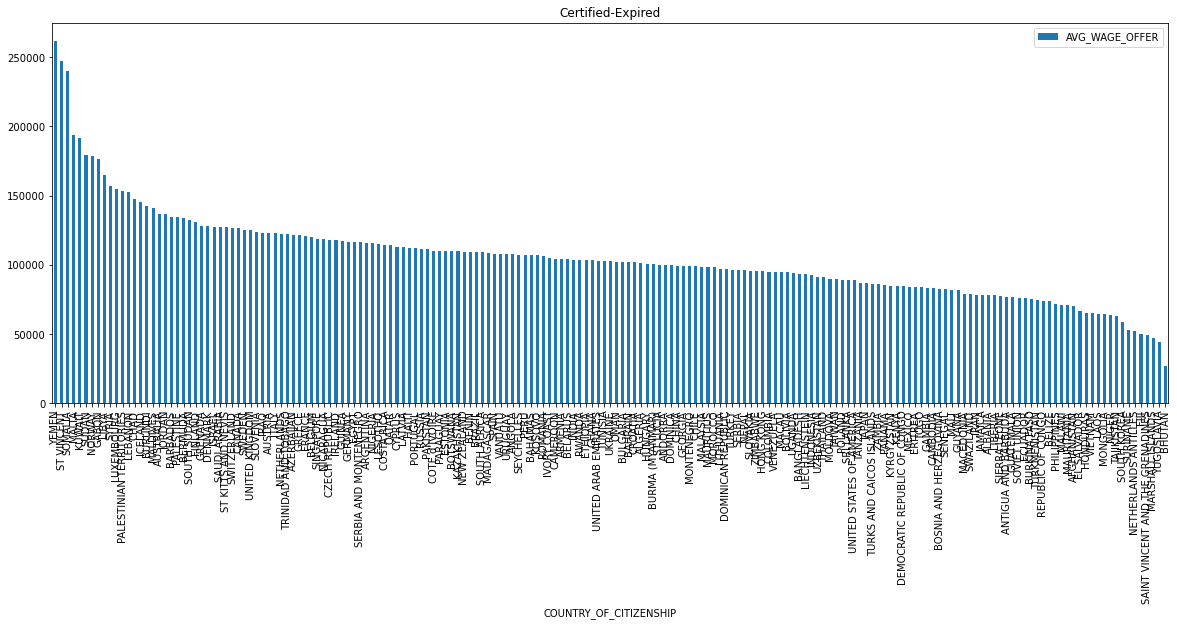

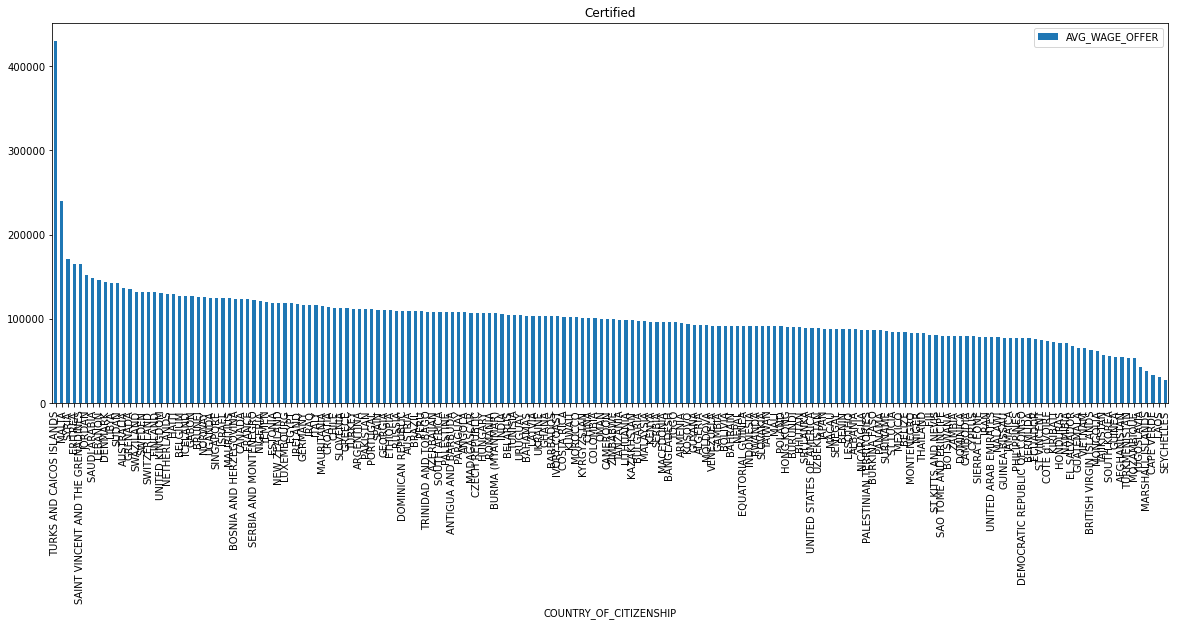

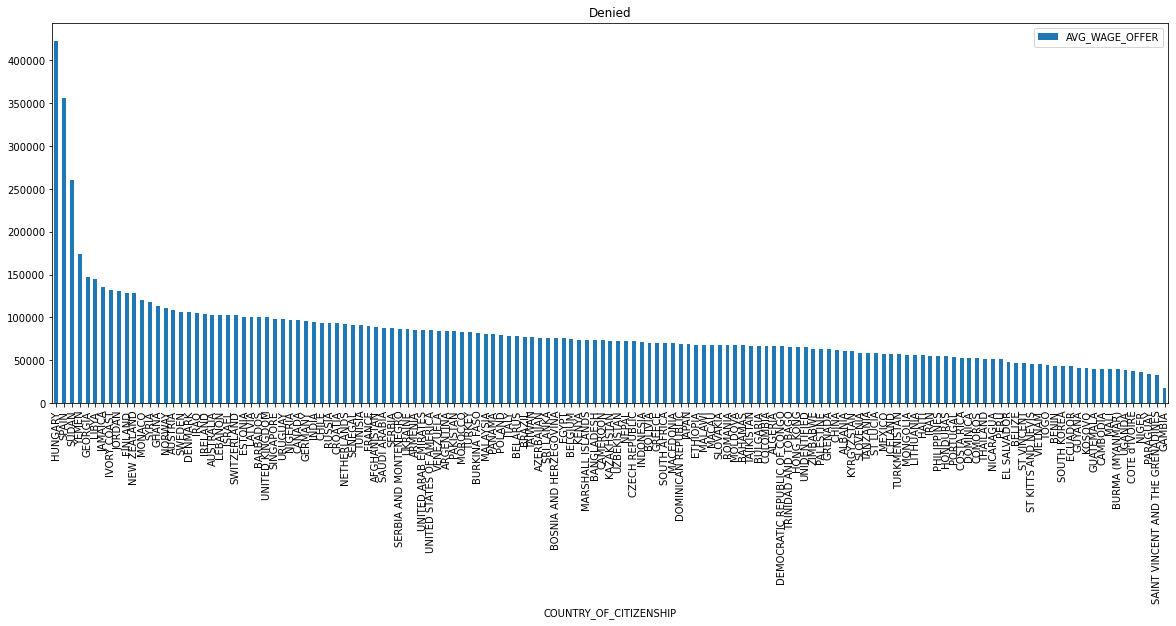

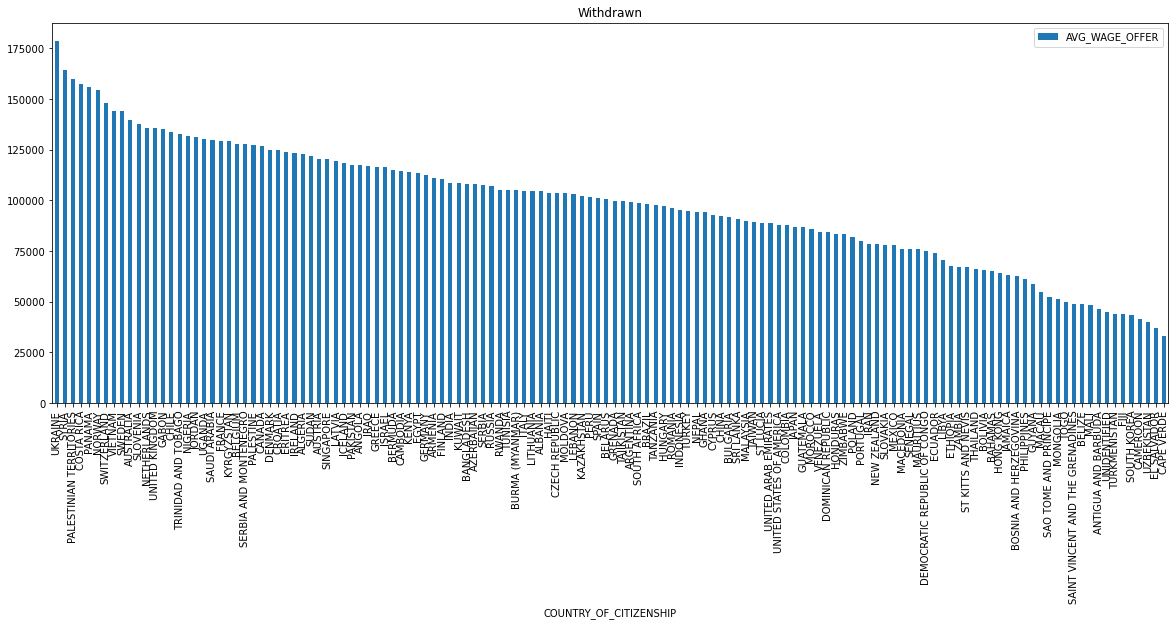

In [666]:
d = mdfall[['AVG_WAGE_OFFER', 'CASE_STATUS', 'COUNTRY_OF_CITIZENSHIP']]
a = d[d['CASE_STATUS'] == 'Denied'].groupby(['COUNTRY_OF_CITIZENSHIP']).mean().sort_values(by='AVG_WAGE_OFFER', ascending=False).head(5)

for i in list(d['CASE_STATUS'].unique()):
    a = d[d['CASE_STATUS'] == i].groupby(['COUNTRY_OF_CITIZENSHIP']).mean().sort_values(by='AVG_WAGE_OFFER', ascending=False).reset_index()
    a.set_index('COUNTRY_OF_CITIZENSHIP')
    print('graph for wage of ',i, 'petition outcome holders' )
    a.plot.bar(y='AVG_WAGE_OFFER', x='COUNTRY_OF_CITIZENSHIP', figsize=(20, 7),layout=(-1, 3), rot=90, title=i)  
    
for i in list(d['CASE_STATUS'].unique()):
    a = d[d['CASE_STATUS'] == i].groupby(['COUNTRY_OF_CITIZENSHIP']).mean().sort_values(by='AVG_WAGE_OFFER', ascending=False).head(5)
    print('highest wages offered for', i, ' status')
    print(a)  

for i in list(d['CASE_STATUS'].unique()):
    a = d[d['CASE_STATUS'] == i].groupby(['COUNTRY_OF_CITIZENSHIP']).mean().sort_values(by='AVG_WAGE_OFFER', ascending=True).head(5)
    print('lowest wages offered for', i, ' status')
    print(a)
##Having calculated that average value
##We can now see the highest and lowest annual salary values 
##that have been offered to holders of different petition status
##and graphs describing the different wages offered to holders of different petition status

graph for wage of  Certified-Expired petition outcome holders
graph for wage of  Certified petition outcome holders
graph for wage of  Denied petition outcome holders
graph for wage of  Withdrawn petition outcome holders
highest wages offered for Certified-Expired  status
                    AVG_WAGE_OFFER
CLASS_OF_ADMISSION                
G-1                  182852.500000
E-3                  134576.718750
G-4                  131662.734375
AOS                  127500.000000
O-1                  126206.210938
highest wages offered for Certified  status
                    AVG_WAGE_OFFER
CLASS_OF_ADMISSION                
E-3                  138857.375000
O-1                  128172.023438
G-4                  124601.703125
TPS                  116634.765625
L-1                  116099.546875
highest wages offered for Denied  status
                    AVG_WAGE_OFFER
CLASS_OF_ADMISSION                
P-4                   126630.00000
G-4                   123750.00000
O-2         

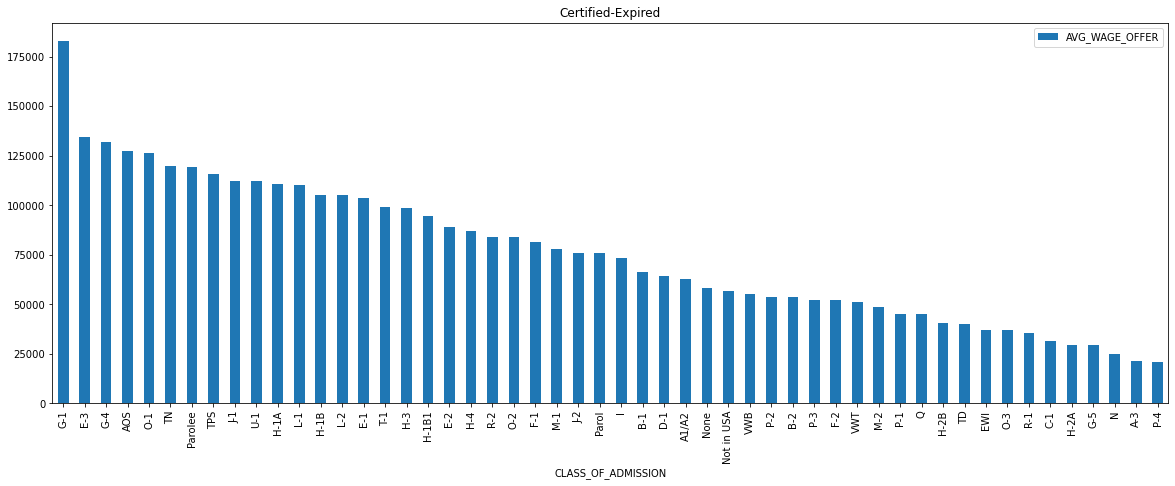

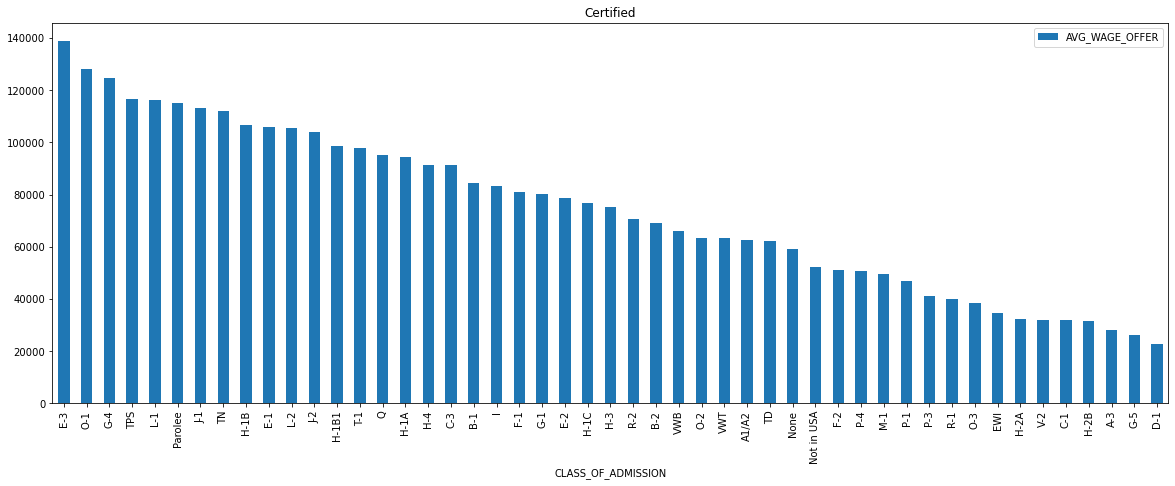

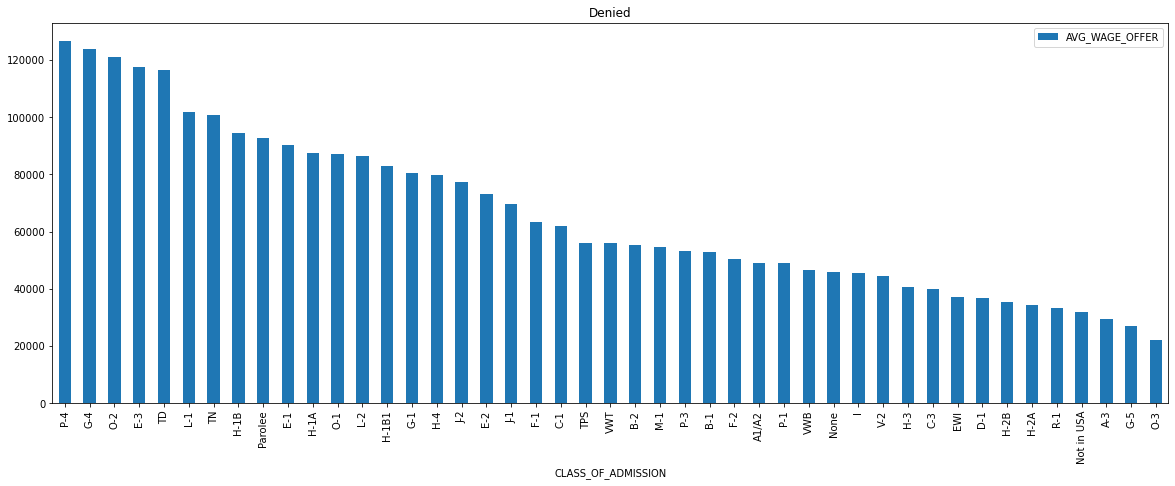

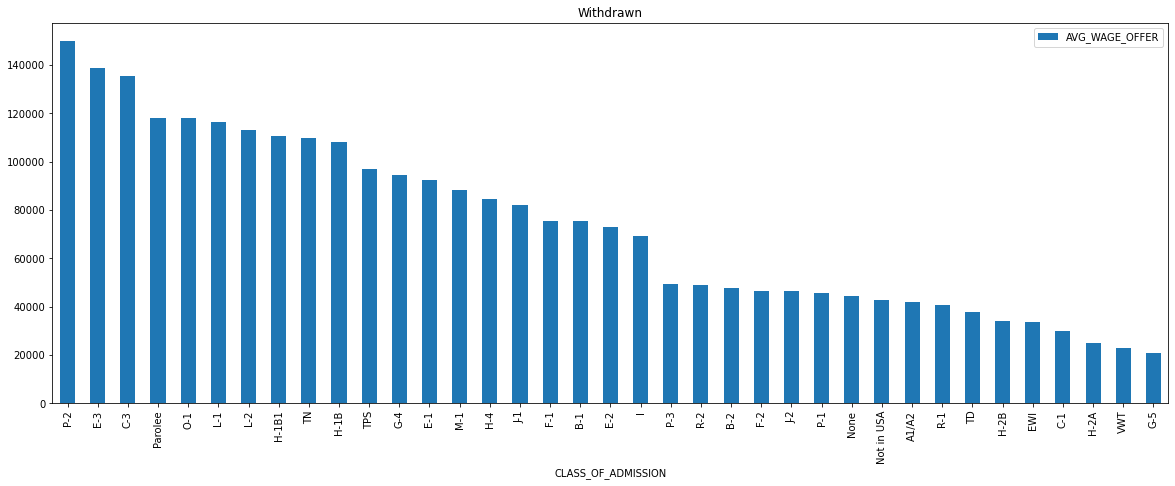

In [667]:
assess_column='CLASS_OF_ADMISSION'

d = mdfall[['AVG_WAGE_OFFER', 'CASE_STATUS', assess_column]]
a = d[d['CASE_STATUS'] == 'Denied'].groupby([assess_column]).mean().sort_values(by='AVG_WAGE_OFFER', ascending=False).head(5)

for i in list(d['CASE_STATUS'].unique()):
    a = d[d['CASE_STATUS'] == i].groupby([assess_column]).mean().sort_values(by='AVG_WAGE_OFFER', ascending=False).reset_index()
    a.set_index(assess_column)
    print('graph for wage of ',i, 'petition outcome holders' )
    a.plot.bar(y='AVG_WAGE_OFFER', x=assess_column, figsize=(20, 7),layout=(-1, 3), rot=90, title=i)  
    
for i in list(d['CASE_STATUS'].unique()):
    a = d[d['CASE_STATUS'] == i].groupby([assess_column]).mean().sort_values(by='AVG_WAGE_OFFER', ascending=False).head(5)
    print('highest wages offered for', i, ' status')
    print(a)  

for i in list(d['CASE_STATUS'].unique()):
    a = d[d['CASE_STATUS'] == i].groupby([assess_column]).mean().sort_values(by='AVG_WAGE_OFFER', ascending=True).head(5)
    print('lowest wages offered for', i, ' status')
    print(a)

graph for wage of  Certified-Expired petition outcome holders
graph for wage of  Certified petition outcome holders
graph for wage of  Denied petition outcome holders
graph for wage of  Withdrawn petition outcome holders
highest wages offered for Certified-Expired  status
                     AVG_WAGE_OFFER
JOB_INFO_WORK_STATE                
WYOMING               204877.500000
MAINE                 159885.187500
NORTH DAKOTA          143614.046875
WEST VIRGINIA         135140.328125
SOUTH DAKOTA          128189.757812
highest wages offered for Certified  status
                     AVG_WAGE_OFFER
JOB_INFO_WORK_STATE                
SOUTH DAKOTA          178965.656250
WEST VIRGINIA         160175.078125
NORTH DAKOTA          153800.437500
WASHINGTON            122844.078125
MAINE                 121031.937500
highest wages offered for Denied  status
                      AVG_WAGE_OFFER
JOB_INFO_WORK_STATE                 
MAINE                  173391.406250
DISTRICT OF COLUMBIA   1461

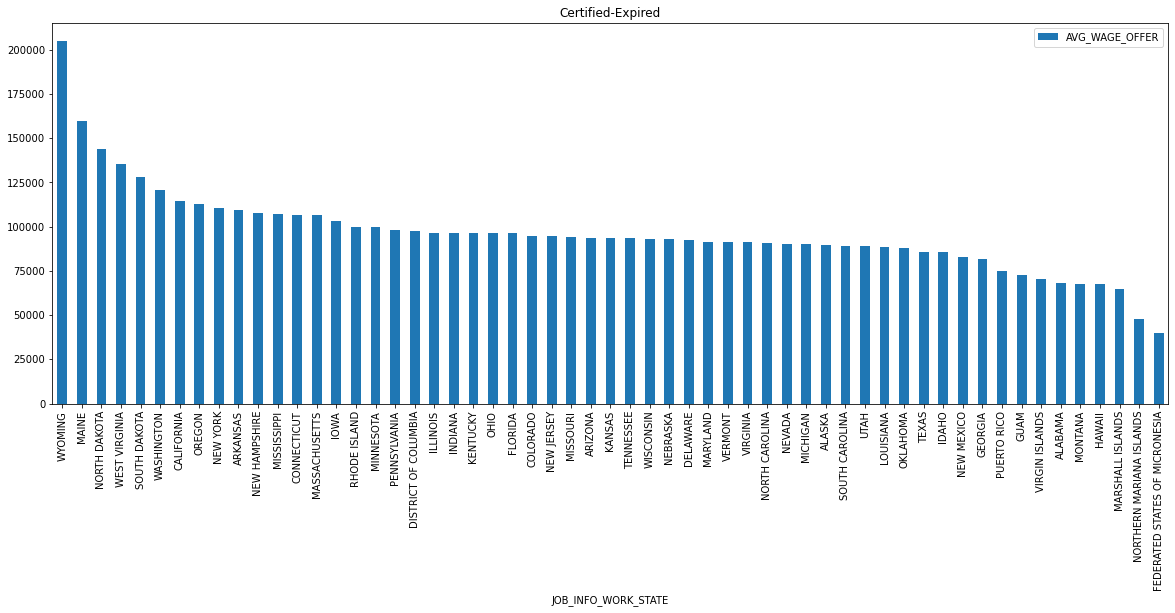

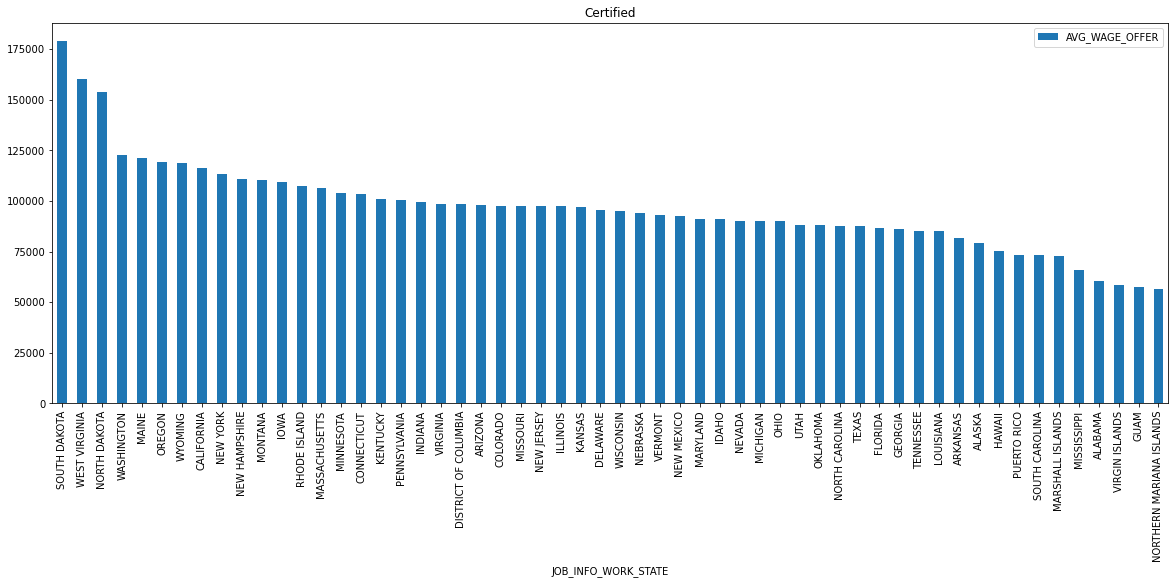

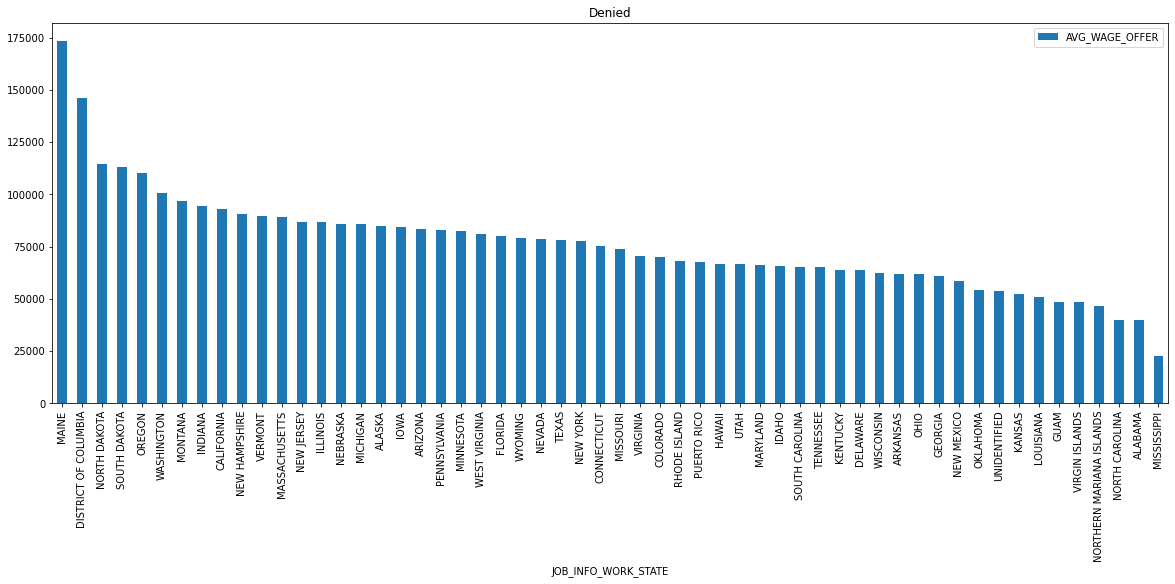

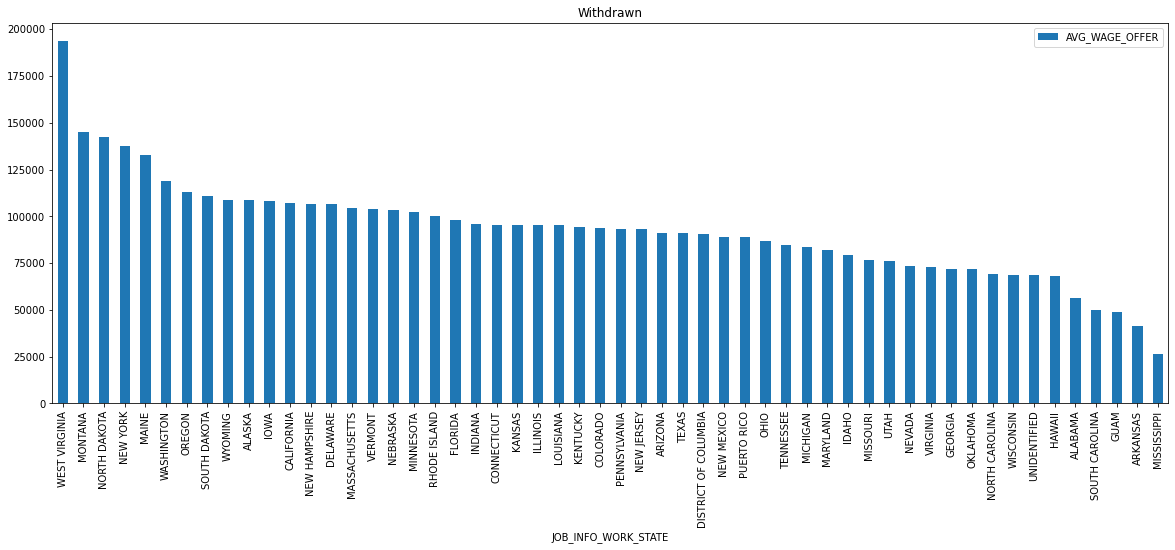

In [668]:
assess_column='JOB_INFO_WORK_STATE'

d = mdfall[['AVG_WAGE_OFFER', 'CASE_STATUS', assess_column]]
a = d[d['CASE_STATUS'] == 'Denied'].groupby([assess_column]).mean().sort_values(by='AVG_WAGE_OFFER', ascending=False).head(5)

for i in list(d['CASE_STATUS'].unique()):
    a = d[d['CASE_STATUS'] == i].groupby([assess_column]).mean().sort_values(by='AVG_WAGE_OFFER', ascending=False).reset_index()
    a.set_index(assess_column)
    print('graph for wage of ',i, 'petition outcome holders' )
    a.plot.bar(y='AVG_WAGE_OFFER', x=assess_column, figsize=(20, 7),layout=(-1, 3), rot=90, title=i)  
    
for i in list(d['CASE_STATUS'].unique()):
    a = d[d['CASE_STATUS'] == i].groupby([assess_column]).mean().sort_values(by='AVG_WAGE_OFFER', ascending=False).head(5)
    print('highest wages offered for', i, ' status')
    print(a)  

for i in list(d['CASE_STATUS'].unique()):
    a = d[d['CASE_STATUS'] == i].groupby([assess_column]).mean().sort_values(by='AVG_WAGE_OFFER', ascending=True).head(5)
    print('lowest wages offered for', i, ' status')
    print(a)

In general, approximately half or slightly less than half of petitions get certified. It could be said around 90% get certified, but around 40-50% gets certified-expired. While there are some outliers, there is not a drastic difference in wage offers to applicants. Wage offers to successful applicants tend to be higher than for applicants who get denied. Most people making a petition are already H-1B holders. India, China, South Korea, Mexico and Canada - generally Asian and North American countries make the most petitions. California, Texas, New Jersey and New York are the states of the work location which submit the most petitions. 